In [1]:
import glob
import datetime
import scipy.io
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
% matplotlib inline

In [2]:
coordinate_name=glob.glob('/ocean/yingkai/GEOTRACES/NEMO-CODE/NEMOGCM/CONFIG/ANHA4_OFF/EXP00/mesh_zgr.nc')
coordinate_obj=nc.Dataset(coordinate_name[0])
nav_lon=coordinate_obj.variables['nav_lon'][:]
nav_lat=coordinate_obj.variables['nav_lat'][:]
e1t = coordinate_obj.variables['e1t'][:]
e2t = coordinate_obj.variables['e2t'][:]
e3t = coordinate_obj.variables['e3t_0'][:]

In [3]:
#fig = plt.figure(figsize=(15, 15))
#ax = fig.gca()
#proj=Basemap(projection='npstere', resolution='l', boundinglat=67.5, lon_0=0, round=True, ax=ax)
##proj.drawcoastlines(linewidth=1.5, color='k')
#x, y=proj(nav_lon, nav_lat)
#proj.pcolor(x, y, nav_lon, vmin=-180, vmax=180, cmap=plt.cm.gray)
#
#fig.savefig('nav_lon.png', dpi=400, orientation='portrait', papertype='a4', 
#            format='png', bbox_inches='tight', pad_inches=0)

In [4]:
#fig = plt.figure(figsize=(15, 15))
#ax = fig.gca()
#proj=Basemap(projection='npstere', resolution='l', boundinglat=67.5, lon_0=0, round=True, ax=ax)
##proj.drawcoastlines(linewidth=1.5, color='k')
#x, y=proj(nav_lon, nav_lat)
#proj.pcolor(x, y, nav_lat, vmin=67.5, vmax=90, cmap=plt.cm.gray)
#
#fig.savefig('nav_lat.png', dpi=400, orientation='portrait', papertype='a4', 
#            format='png', bbox_inches='tight', pad_inches=0)

In [5]:
#MAT = scipy.io.loadmat('_data/Exchange/UV_current.mat')
#vozocrtx0 = MAT['vozocrtx0'][:]
#vomecrty0 = MAT['vomecrty0'][:]
#u = np.nanmean(vozocrtx0, 0)
#v = np.nanmean(vomecrty0, 0)

In [6]:
#sp = np.sqrt(u*u+v*v)
#u = u/sp
#v = v/sp

In [7]:
#n = 4
#fig = plt.figure(figsize=(15, 15))
#ax = fig.gca()
#proj=Basemap(projection='npstere', resolution='l', boundinglat=67.5, lon_0=0, round=True, ax=ax)
#proj.drawcoastlines(linewidth=1.5, color='b')
#x, y=proj(nav_lon, nav_lat)
#proj.quiver(x[::n, ::n], y[::n, ::n], u[::n, ::n], v[::n, ::n],
#            width=0.001, scale=95, color='b')
#
#fig.savefig('XXXX.png', dpi=400, orientation='portrait', papertype='a4', 
#            format='png', bbox_inches='tight', pad_inches=0)

In [8]:
from scipy.interpolate import griddata

In [56]:
MAT = scipy.io.loadmat('mask_Arctic.mat')
nav_lon_map = MAT['nav_lon'][::3, ::3]
nav_lat_map = MAT['nav_lat'][::3, ::3]
mask = MAT['mask'][::3, ::3]

In [57]:
rawx = nav_lon_map.flatten()
rawy = nav_lat_map.flatten()
id1 = ~np.isnan(rawx)
id2 = ~np.isnan(rawy)
id12 = np.logical_or(id1, id2)

In [58]:
x = rawx[id12]
y = rawy[id12]
mask_flat = mask.flatten()[id12]

In [67]:
lon, lat = np.meshgrid(np.linspace(-180, 180, 720), np.linspace(67.5, 90, 360))

In [68]:
mask_xy = griddata((x, y), mask_flat, (lon, lat), method='linear')

In [69]:
mask_xy = np.ma.masked_where(np.isnan(mask_xy), mask_xy)

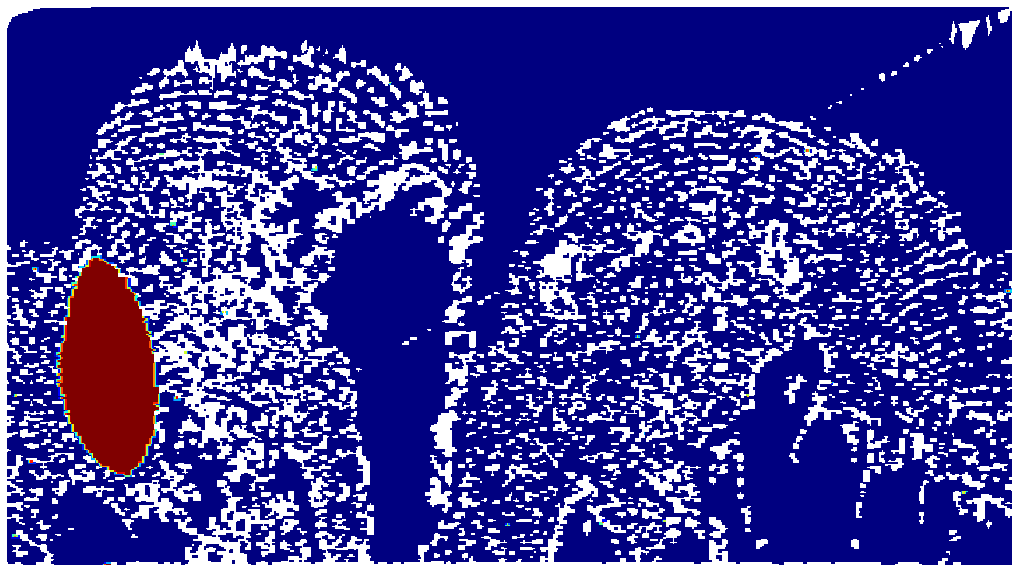

In [73]:
fig=plt.figure(figsize=(18, 10));
ax = fig.gca(); ax.set_xlim([-180, 180]); ax.set_ylim([67.5, 90])

ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False) 
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

ax.tick_params(axis="both", which="both", bottom="off", top="off",    
            labelbottom="off", left="off", right="off", labelleft="off")

ax.pcolor(lon, lat, mask_xy)
fig.savefig('nav_lat.png', dpi=400, orientation='portrait', papertype='a4', 
            format='png', bbox_inches='tight', pad_inches=0)

In [50]:
test = np.copy(mask_xy)

In [51]:
test[test!=1]=np.nan

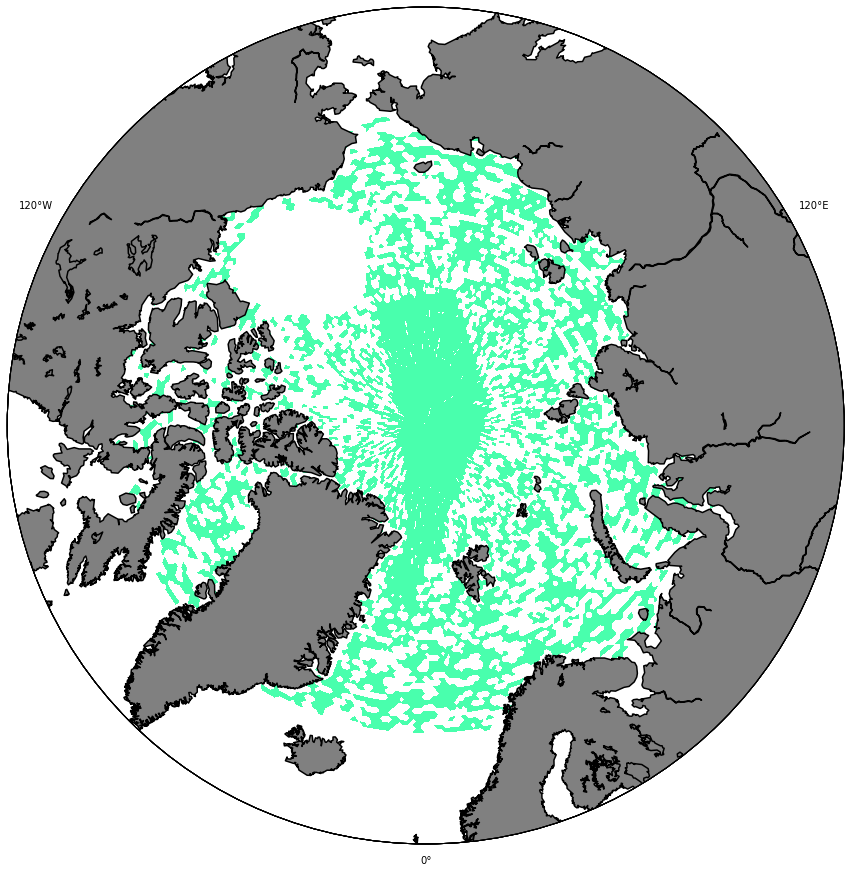

In [52]:
fig=plt.figure(figsize=(15, 15));
ax = fig.gca()
proj=Basemap(projection='npstere', resolution='l', boundinglat=60, lon_0=0, round=True, ax=ax)
proj.drawmeridians(np.arange(0, 360, 120), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
proj.drawcoastlines(linewidth=1.5, color='k')
x, y = proj(lon, lat)
proj.contourf(x, y, test)